## ##지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

In [ ]:
 import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
#데이터불러오고 사용할 데이터 정리
df = pd.read_csv('/content/vgames2.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.dtypes #데이터타입 확인
#년도 빼고 전부 object 필요한 부분 숫자로 바꾸기
df.isna( ).sum( ) #결측치 확인

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
 df = df.dropna(axis=0) #결측치 제거
df.head(13)

Name Platform    Year  \
0                        Candace Kane's Candy Factory       DS  2008.0   
1                                      The Munchables      Wii  2009.0   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
3                    Deal or No Deal: Special Edition       DS  2010.0   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
5                              Power Pro Kun Pocket 8       DS  2005.0   
6               JASF: Jane's Advanced Strike Fighters       PC  2011.0   
7                      Samurai Warriors: State of War      PSP  2005.0   
8                                          Imabikisou      PS3  2007.0   
9   The Penguins of Madagascar: Dr. Blowhole Retur...      PS3  2011.0   
10                                        Ford Racing       PS  2001.0   
11         Harvest Moon: More Friends of Mineral Town      GBA  2003.0   
12                                      Mount & Blade       PC  2008.0   

           Genre                     Publisher NA_Sales EU_Sales JP_Sales  \
0         Action                     Destineer     0.04        0        0   
1         Action            Namco Bandai Games     0.17        0        0   
2      Adventure                     Alchemist        0        0     0.02   
3           Misc                     Zoo Games     0.04        0        0   
4       Platform                   D3Publisher     0.12     0.09        0   
5         Sports  Konami Digital Entertainment        0        0     0.14   
6     Simulation                   Deep Silver     0.02     0.01        0   
7         Action                    Tecmo Koei     0.07        0     0.11   
8      Adventure                          Sega        0        0     0.04   
9         Action                           THQ     0.04     0.03        0   
10        Racing            Empire Interactive     480K    0.33M       0K   
11    Simulation                       Ubisoft     0.14     0.05        0   
12  Role-Playing           Paradox Interactive        0     0.02        0   

   Other_Sales  
0            0  
1         0.01  
2            0  
3            0  
4         0.04  
5            0  
6            0  
7         0.01  
8            0  
9         0.01  
10        0.06  
11           0  
12           0

In [ ]:
df.isna( ).sum( ) #결측치 확인 결측치는 제거했음 

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
#파일 확인결과 K, M이라는 알파벳이 포함되어있음
#K= 0.001 M = 1 을 나타내기 때문에 바꿔주는 작업을 해야함

In [ ]:
#replace를 이용하여 k,m값을 대체시켜주고, 그것을 수학적으로 바꿔주는   map  메소드를 사용한다.

df["NA_Sales"] = df["NA_Sales"].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] =  df['EU_Sales'].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] =  df['JP_Sales'].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).astype(float)
#2차 데이터 타입 확인
df.dtypes #오브젝트였던 숫자가 float 로 바뀐것을 확인

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
df.dtypes
df["NA_Sales"] = df["NA_Sales"].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).map(pd.eval).mul(100).astype(int)
df['EU_Sales'] =  df['EU_Sales'].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).map(pd.eval).mul(100).astype(int)
df['JP_Sales'] =  df['JP_Sales'].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).map(pd.eval).mul(100).astype(int)
df['Other_Sales'] = df['Other_Sales'].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval).map(pd.eval).mul(100).astype(int)
#2차 데이터 타입 확인
df.dtypes #오브젝트였던 숫자가 float 로 바뀐것을 확인

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales         int64
EU_Sales         int64
JP_Sales         int64
Other_Sales      int64
dtype: object

In [ ]:
df.head(12)

Name Platform    Year  \
0                        Candace Kane's Candy Factory       DS  2008.0   
1                                      The Munchables      Wii  2009.0   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
3                    Deal or No Deal: Special Edition       DS  2010.0   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
5                              Power Pro Kun Pocket 8       DS  2005.0   
6               JASF: Jane's Advanced Strike Fighters       PC  2011.0   
7                      Samurai Warriors: State of War      PSP  2005.0   
8                                          Imabikisou      PS3  2007.0   
9   The Penguins of Madagascar: Dr. Blowhole Retur...      PS3  2011.0   
10                                        Ford Racing       PS  2001.0   
11         Harvest Moon: More Friends of Mineral Town      GBA  2003.0   

         Genre                     Publisher  NA_Sales  EU_Sales  JP_Sales  \
0       Action                     Destineer         4         0         0   
1       Action            Namco Bandai Games        17         0         0   
2    Adventure                     Alchemist         0         0         2   
3         Misc                     Zoo Games         4         0         0   
4     Platform                   D3Publisher        12         9         0   
5       Sports  Konami Digital Entertainment         0         0        14   
6   Simulation                   Deep Silver         2         1         0   
7       Action                    Tecmo Koei         7         0        11   
8    Adventure                          Sega         0         0         4   
9       Action                           THQ         4         3         0   
10      Racing            Empire Interactive        48        33         0   
11  Simulation                       Ubisoft        14         5         0   

    Other_Sales  
0             0  
1             1  
2             0  
3             0  
4             4  
5             0  
6             0  
7             1  
8             0  
9             1  
10            6  
11            0

In [ ]:
#나라별 판매를 모두합한 'Total_Sales'라는 새로운 컬럼생성
df['Total_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

#년도중에 제대로 정리되지 않는 년도가 있음 
df.groupby(df["Year"]).size()
#년도가 천단위가 아닌 데이터가 있어서 삭제함 *기준을 1900년대로 잡음
df =df[df.Year>1900]
#표본이 적은 2017,2020삭제(적은표본이라서 분석에 크게 영향을 안미칠꺼같아서 제거)
df =df[df.Year<2017]
#확인하니 지워짐
df.groupby(df["Year"]).size()

Year
1980.0       8
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      20
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     120
1995.0     215
1996.0     259
1997.0     287
1998.0     374
1999.0     336
2000.0     345
2001.0     478
2002.0     823
2003.0     767
2004.0     736
2005.0     930
2006.0     998
2007.0    1192
2008.0    1413
2009.0    1418
2010.0    1246
2011.0    1123
2012.0     650
2013.0     543
2014.0     578
2015.0     606
2016.0     337
dtype: int64

In [ ]:
#지역에 따라서 선호하는 게임장르가 다를까?? 
#NA 북미, EU 유럽 JP일본 Other 이렇게 4가지로 나눠서 게산해봄 
#게임장르(Genre)가 어떤것이 있는지 확인
df.groupby(df["Genre"]).size()
# 확인결과('Action','Adventure','Fighting','Misc','Platform', 'Puzzle','Racing','Role-Playing', 'Shooter', 'Simulation','Sports','Strategy')
#총 12가지 종류의 게임이 있음 

Genre
Action          3225
Adventure       1264
Fighting         829
Misc            1671
Platform         865
Puzzle           558
Racing          1209
Role-Playing    1455
Shooter         1268
Simulation       840
Sports          2289
Strategy         664
dtype: int64

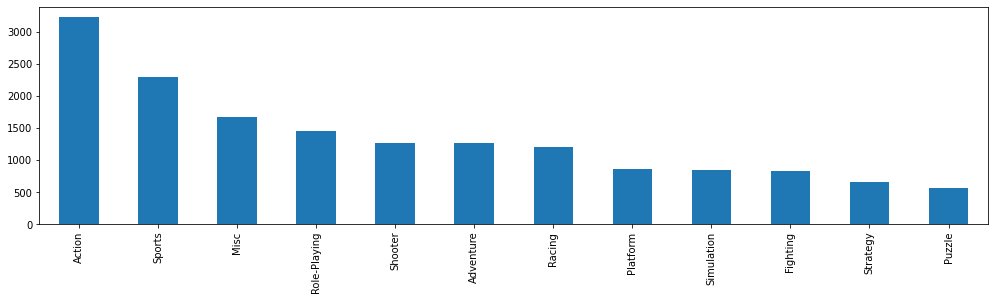

In [ ]:
#먼저 어떤 장르가 가장 많은 게임수를 가지고 있는지에 대해서 한번 계산해봄 엑션이 가장많고 퍼즐이 가장 적다
from collections import Counter
from matplotlib import font_manager, rc
A = Counter(df["Genre"])
words = dict(A.most_common(n=12))
pd.DataFrame.from_dict([words]).iloc[0].plot(kind='bar', figsize=(17, 4),)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
##게임종류별 북미에서 게임을 산 횟수의 합을 나타냄 
# 국가간의 숫자차이가 크기때문에 정확한 비교를 위해서 비율로 나타냄 
GenreN = df.groupby('Genre').NA_Sales.sum()
GenreN = GenreN / GenreN.sum()
GenreN

Genre
Action          0.199977
Adventure       0.023676
Fighting        0.051429
Misc            0.092132
Platform        0.103414
Puzzle          0.028275
Racing          0.082621
Role-Playing    0.071743
Shooter         0.133414
Simulation      0.042250
Sports          0.155225
Strategy        0.015844
Name: NA_Sales, dtype: float64

In [ ]:

#라벨지정
label = ['Action','Adventure','Fighting','Misc','Platform', 'Puzzle','Racing','Role-Playing', 'Shooter', 'Simulation','Sports','Strategy']
index = np.arange(len(label))

## 'NA_Sales'로 그래프 그려보기
plt.bar(index,GenreN,width=0.7)

plt.title('Genre of NA_Sales', fontsize=10)
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Genre of NA_Sales', fontsize=13)
plt.xticks(index, label, rotation=0,  fontsize=10)
plt.show()


In [ ]:
#나머지 국가들 계산해보기
#유럽
GenreE = df.groupby('Genre').EU_Sales.sum()
GenreE = GenreE / GenreE.sum()
#일본
GenreJ = df.groupby('Genre').JP_Sales.sum()
GenreJ = GenreJ / GenreJ.sum()
#기타
Genre0 = df.groupby('Genre').Other_Sales.sum()
Genre0 = Genre0 / Genre0.sum()

##지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
##1번 요구사항을확인하기위한 최종그래프

In [ ]:
#4개를 합친 그래프를 만들어서 비교하기
#더 비교하기 편한 그래프가 있겠지만 아직 히스토그램이상은 만들기 힘들다..ㅠㅠ
#자세한 설명은 피피티를 통해설명
bar_width = 0.2
alpha = 0.6
p1 = plt.bar(index, GenreN, 
             bar_width, 
             color='b', 
             alpha=alpha,
             label='NA')
p2 = plt.bar(index + bar_width, GenreE, 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='EU')
p3 = plt.bar(index + bar_width+ bar_width, GenreJ, 
             bar_width, 
             color='green', 
             alpha=alpha,
             label='JP')
p4 = plt.bar(index + bar_width + bar_width + bar_width, Genre0, 
             bar_width, 
             color='black', 
             alpha=alpha,
             label='other')
plt.title('Genre of Sales', fontsize=10)
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Genre of Sales', fontsize=13)
plt.xticks(index, label, rotation=0,  fontsize=10)
plt.legend((p1[0], p2[0],p3[0],p4[0]), ('NA', 'EU', 'JP','other'), fontsize=10)

plt.show()


## 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 연도별 장르 총 판매량
year_Genre_S = df.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_sale = year_Genre_S.groupby(by=['Year'])['Total_Sales'].transform(max) ==year_Genre_S['Total_Sales']
#그해의 최고로 잘팔린 장르
year_best_sale =year_Genre_S[year_sale].reset_index(drop=True)

genre = year_best_sale['Genre']

plt.figure(figsize=(20, 13))
g = sns.barplot(x='Year', y='Total_Sales', data= year_best_sale)
index = 0
for value in year_best_sale['Total_Sales']:
    g.text(index, value +1 , str(genre[index] + '-' +str(round(value, 2))), color='#212121', size=10, rotation= 90)
    index += 1

plt.title("year's popular game genre", fontsize=30)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Total sales volume", fontsize=20)

plt.xticks(rotation=90)
plt.show()

## 년도별로 가장 인기있는 장르를 볼수있는 그래프를 작성해보니 액션장르가 전체적으로 인기가 많으며 2000년대를 기준으로 이전에는 플렛폼이인기가 많은 편이고 이후에는 액션이 압도적 인기이다

[#아래 연도에 따른 장르별 총 판매량을 이용한 시각화 


In [ ]:
# 연도별 장르 총 판매량 
year_all_sales = df.groupby(['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_all_sales 

Year         Genre  Total_Sales
0    1980.0        Action           34
1    1980.0      Fighting           77
2    1980.0          Misc          270
3    1980.0       Shooter          707
4    1981.0        Action         1478
..      ...           ...          ...
380  2016.0  Role-Playing          674
381  2016.0       Shooter         1396
382  2016.0    Simulation           39
383  2016.0        Sports         1445
384  2016.0      Strategy           52

[385 rows x 3 columns]

In [ ]:
sns.relplot(data=year_all_sales , x="Year", y= "Total_Sales", hue="Genre", kind="line", height=14)

#2000년을 기준으로 이전의 20년은 다양한 게임의 장르가 인시가 많은편이며 편차가 많이 큰편은 아니다
#2000년이후에는 액션과 스포츠와 같은 활동적인형태의 게임이 인기가 월등하게 많아짐 또한 판매량의 경우 2010년에 늘었다가 다시 줄어드는 형태가 보인다. 

# **출고량이 높은게임에 대한 분석 및 시각화**

1.나라별 출고량 시각화

427735 237646 125745 77801


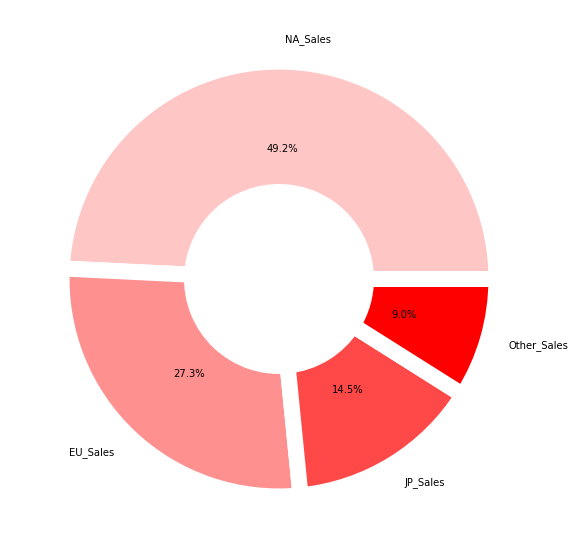

In [ ]:
a=df['NA_Sales'].sum()
b=df['EU_Sales'].sum()
c=df['JP_Sales'].sum()
d=df['Other_Sales'].sum()
print(a,b,c,d)
sales =  [a,b,c,d]
sales_name = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
colors = ['#FFC6C6','#FF9090','#FF4848','#FF0000']
wedgeprops={'width':0.6, 'edgecolor': 'w', 'linewidth' : 16}
plt.pie(sales, labels = sales_name, autopct = '%.1f%%', colors=colors, wedgeprops = wedgeprops)
plt.show()
##북미가 가장 출고량이 높고 그다음 유럽 다음 일본 나머지국가들은 가장 낮다

In [ ]:
##출고량이 가장 높은 30개의 게임
sortdf = df.sort_values(by=['Total_Sales'], ascending=False)
top30_game_sale = sortdf.head(30)
top30_game_sale = top30_game_sale[['Name', 'Year', 'Genre', 'Total_Sales']]
top30_game_sale = top30_game_sale.sort_values(by=['Total_Sales'], ascending=False)
top30_game_sale = top30_game_sale.reset_index(drop=True)
top30_game_sale

Name    Year         Genre  \
0                                     Wii Sports  2006.0        Sports   
1                              Super Mario Bros.  1985.0      Platform   
2                                 Mario Kart Wii  2008.0        Racing   
3                              Wii Sports Resort  2009.0        Sports   
4                       Pokemon Red/Pokemon Blue  1996.0  Role-Playing   
5                                         Tetris  1989.0        Puzzle   
6                          New Super Mario Bros.  2006.0      Platform   
7                                       Wii Play  2006.0          Misc   
8                      New Super Mario Bros. Wii  2009.0      Platform   
9                                      Duck Hunt  1984.0       Shooter   
10                                    Nintendogs  2005.0    Simulation   
11                                 Mario Kart DS  2005.0        Racing   
12                   Pokemon Gold/Pokemon Silver  1999.0  Role-Playing   
13                                       Wii Fit  2007.0        Sports   
14                                  Wii Fit Plus  2009.0        Sports   
15                            Kinect Adventures!  2010.0          Misc   
16                            Grand Theft Auto V  2013.0        Action   
17                 Grand Theft Auto: San Andreas  2004.0        Action   
18                             Super Mario World  1990.0      Platform   
19  Brain Age: Train Your Brain in Minutes a Day  2005.0          Misc   
20                 Pokemon Diamond/Pokemon Pearl  2006.0  Role-Playing   
21                              Super Mario Land  1989.0      Platform   
22                           Super Mario Bros. 3  1988.0      Platform   
23                            Grand Theft Auto V  2013.0        Action   
24                   Grand Theft Auto: Vice City  2002.0        Action   
25                 Pokemon Ruby/Pokemon Sapphire  2002.0  Role-Playing   
26   Brain Age 2: More Training in Minutes a Day  2005.0        Puzzle   
27                        Gran Turismo 3: A-Spec  2001.0        Racing   
28                Call of Duty: Modern Warfare 3  2011.0       Shooter   
29       Pokémon Yellow: Special Pikachu Edition  1998.0  Role-Playing   

    Total_Sales  
0          8274  
1          4024  
2          3583  
3          3300  
4          3138  
5          3024  
6          3001  
7          2900  
8          2860  
9          2831  
10         2475  
11         2343  
12         2309  
13         2271  
14         2199  
15         2182  
16         2138  
17         2081  
18         2062  
19         2021  
20         1834  
21         1814  
22         1727  
23         1638  
24         1615  
25         1584  
26         1530  
27         1496  
28         1475  
29         1464

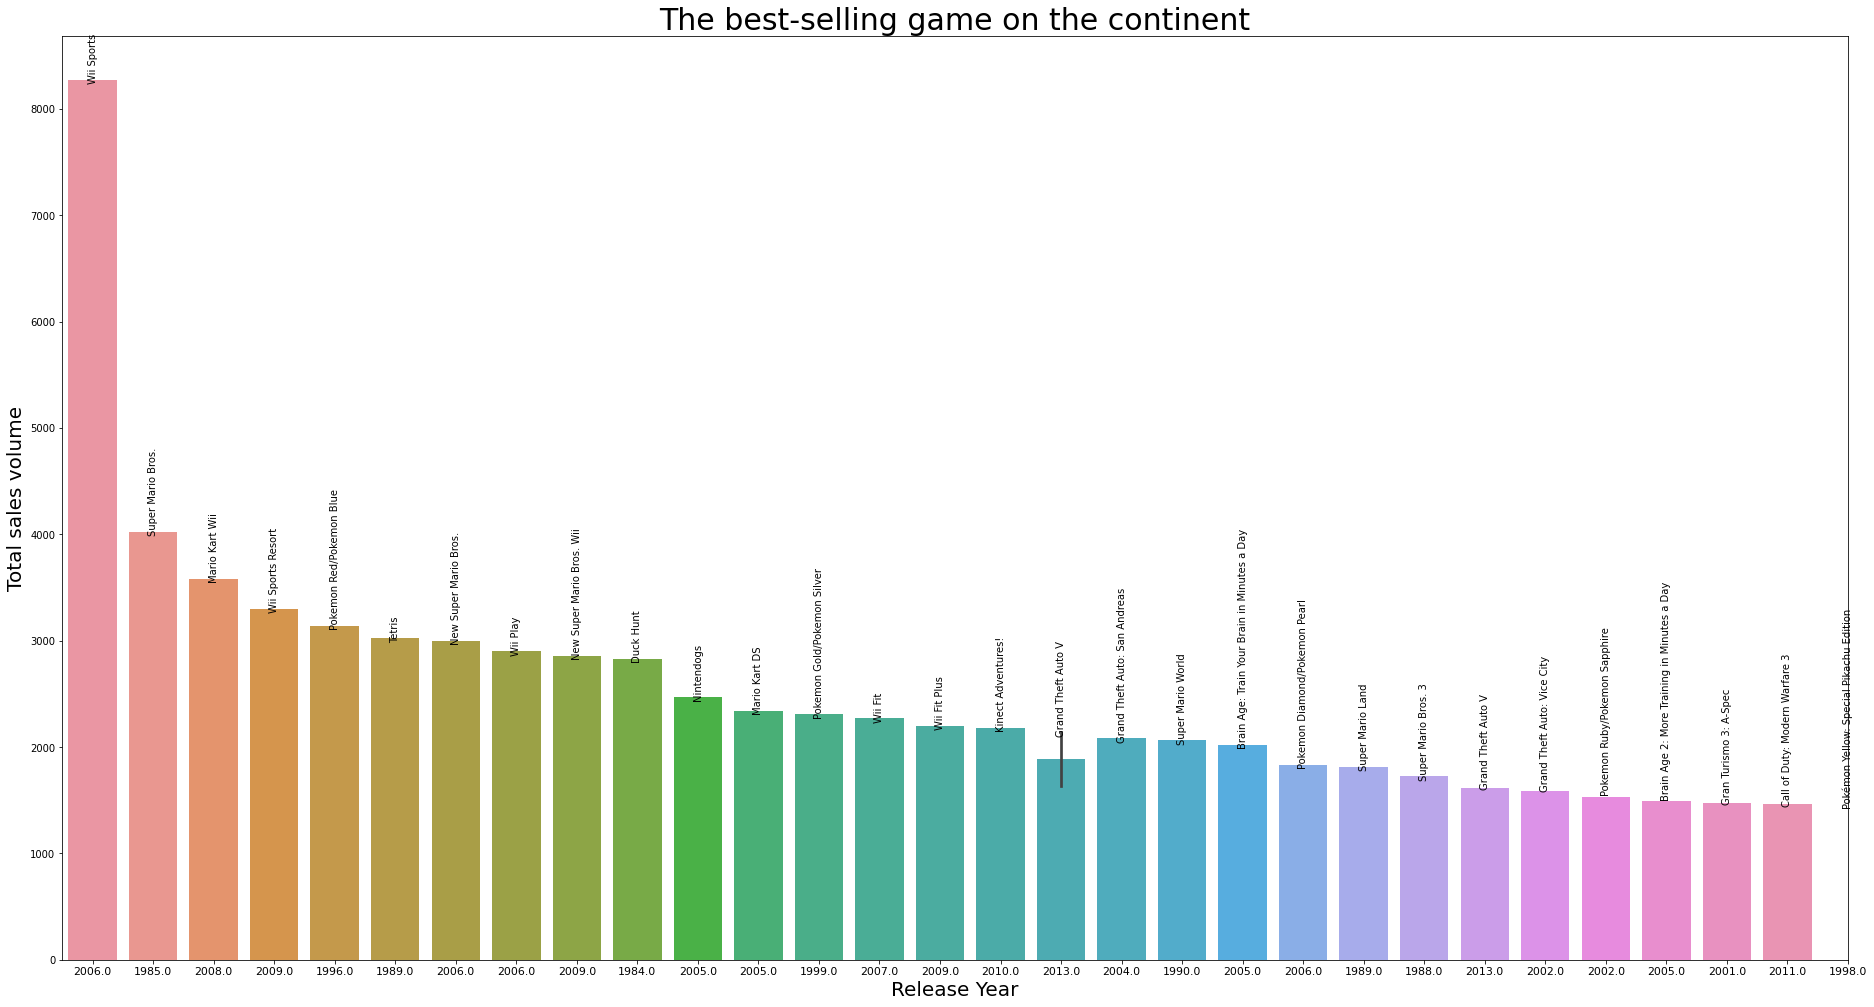

In [ ]:
##씨본 바플롯으로 판매량 top30개를 시각화한 모습

name = top30_game_sale['Name']
year = top30_game_sale['Year']
y = np.arange(0,30)

plt.figure(figsize=(32,17))
g = sns.barplot(x='Name', y='Total_Sales', data=top30_game_sale)
index = 0
for value in top30_game_sale['Total_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=10
           , rotation= 90, ha="center")
    index += 1 
plt.xticks(y, top30_game_sale['Year'], fontsize=11, rotation=0)
plt.title("The best-selling game on the continent", fontsize=30)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)
plt.show()

In [ ]:
#출고량 탑 100을 다시 조사 
sortdf = df.sort_values(by=['Total_Sales'], ascending=False)
top100_game_sale = sortdf.head(100)
top100_game_sale = top100_game_sale[['Name', 'Year', 'Genre', 'Total_Sales']]
top100_game_sale = top100_game_sale.sort_values(by=['Total_Sales'], ascending=False)
top100_game_sale = top100_game_sale.reset_index(drop=True)
top100_game_sale

Name    Year         Genre  Total_Sales
0                               Wii Sports  2006.0        Sports         8274
1                        Super Mario Bros.  1985.0      Platform         4024
2                           Mario Kart Wii  2008.0        Racing         3583
3                        Wii Sports Resort  2009.0        Sports         3300
4                 Pokemon Red/Pokemon Blue  1996.0  Role-Playing         3138
..                                     ...     ...           ...          ...
95                           Battlefield 3  2011.0       Shooter          734
96  The Legend of Zelda: Twilight Princess  2006.0        Action          732
97               Call of Duty: Black Ops 3  2015.0       Shooter          728
98                              Just Dance  2009.0          Misc          727
99                           Battlefield 3  2011.0       Shooter          723

[100 rows x 4 columns]

In [ ]:
import matplotlib.pyplot as plt
##상위100개 게임에서 어떤 종목이 얼마만큼 차지하는지에 대한 자료 시각화t1
t100 = top100_game_sale.groupby(top100_game_sale["Genre"]).size()
t100.reset_index()


Genre   0
0         Action  13
1      Adventure   1
2       Fighting   2
3           Misc   9
4       Platform  16
5         Puzzle   3
6         Racing  10
7   Role-Playing  12
8        Shooter  24
9     Simulation   4
10        Sports   6

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


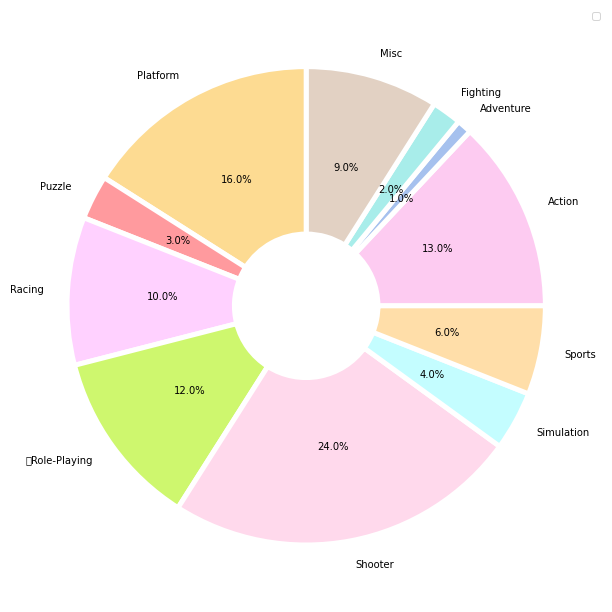

In [ ]:
labels = ['Action', 'Adventure', 'Fighting', 'Misc','Platform',	'Puzzle','Racing','	Role-Playing','Shooter','Simulation','Sports']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#fdcbf1','#a6c1ee','#a8edea','#e2d1c3','#fddb92','#ff9a9e','#ffd1ff','#CEF76E','#FFD9EC','#C4FDFF','#FFDEA9']
plt.rcParams["figure.figsize"] = (11,11)
plt.legend()
plt.pie(t100,labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops,colors=colors)
plt.show()

#지난 40년간 탑 100으로 확인했을때 출고량이 많은 게임들의 장르를 조사하면, Shooter이 가장 높고 그다음이 Platform, Action , Role-Playing , Racing 순으로 높으며 나머지 수치는 낮은 편이다.


In [ ]:
## 두번쨰는 2000년대 이후로 넘어온 이후의 20년간 게임 순위

df1 =df[df.Year>=2000]
#확인하니 지워짐
df1.groupby(df1["Year"]).size()
sortdf1 = df1.sort_values(by=['Total_Sales'], ascending=False)
sales_top100 = sortdf1.head(100)
sales_top100 = sales_top100[['Name', 'Year','Platform', 'Genre', 'Total_Sales']]
sales_top100 = sales_top100.sort_values(by=['Total_Sales'], ascending=False)
F = sales_top100.reset_index(drop=True)
sales_top100

Name    Year Platform         Genre  Total_Sales
2908                    Wii Sports  2006.0      Wii        Sports         8274
12579               Mario Kart Wii  2008.0      Wii        Racing         3583
3352             Wii Sports Resort  2009.0      Wii        Sports         3300
6937         New Super Mario Bros.  2006.0       DS      Platform         3001
3014                      Wii Play  2006.0      Wii          Misc         2900
...                            ...     ...      ...           ...          ...
6102   The Elder Scrolls V: Skyrim  2011.0      PS3  Role-Playing          655
1629          Assassin's Creed III  2012.0      PS3        Action          649
10300         Halo: Combat Evolved  2001.0       XB       Shooter          643
8629       Pokémon Emerald Version  2004.0      GBA  Role-Playing          642
4601                Kingdom Hearts  2002.0      PS2  Role-Playing          640

[100 rows x 5 columns]

In [ ]:
t_n100 = sales_top100.groupby(sales_top100["Genre"]).size()
t_n100.reset_index()

Genre   0
0        Action  16
1      Fighting   3
2          Misc  11
3      Platform   8
4        Puzzle   1
5        Racing  10
6  Role-Playing  11
7       Shooter  26
8    Simulation   4
9        Sports  10

##2000년 이후의 가장 많이 팔린 게임의 장르를 조사했을때 지난 40년간의 데이터와 같이 슈터가 제일 높고 그다음이 엑션 롤플레잉 뮤직 스포츠 순임

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


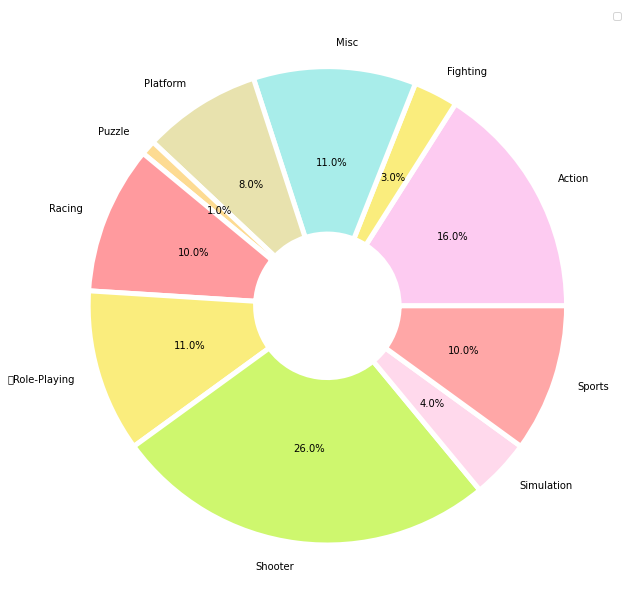

In [ ]:
labels = ['Action','Fighting', 'Misc','Platform',	'Puzzle','Racing','	Role-Playing','Shooter','Simulation','Sports']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#fdcbf1','#FAED7D','#a8edea','#E8E2AE','#fddb92','#ff9a9e','#FAED7D','#CEF76E','#FFD9EC','#FFA7A7','#FFC19E']
plt.rcParams["figure.figsize"] = (11,11)
plt.legend()
plt.pie(t_n100,labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops,colors=colors)
plt.show()

In [ ]:
##20년간 탑 100 자료를 통해 어떤 장르가 가장 출고량이 높으니에 대한 조사
sales_top100
df5 = sales_top100.groupby(['Genre'])['Total_Sales'].sum()
df5.reset_index()

Genre  Total_Sales
0        Action        18324
1      Fighting         2754
2          Misc        13829
3      Platform        11545
4        Puzzle         1530
5        Racing        13685
6  Role-Playing        10654
7       Shooter        26243
8    Simulation         5421
9        Sports        20398

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


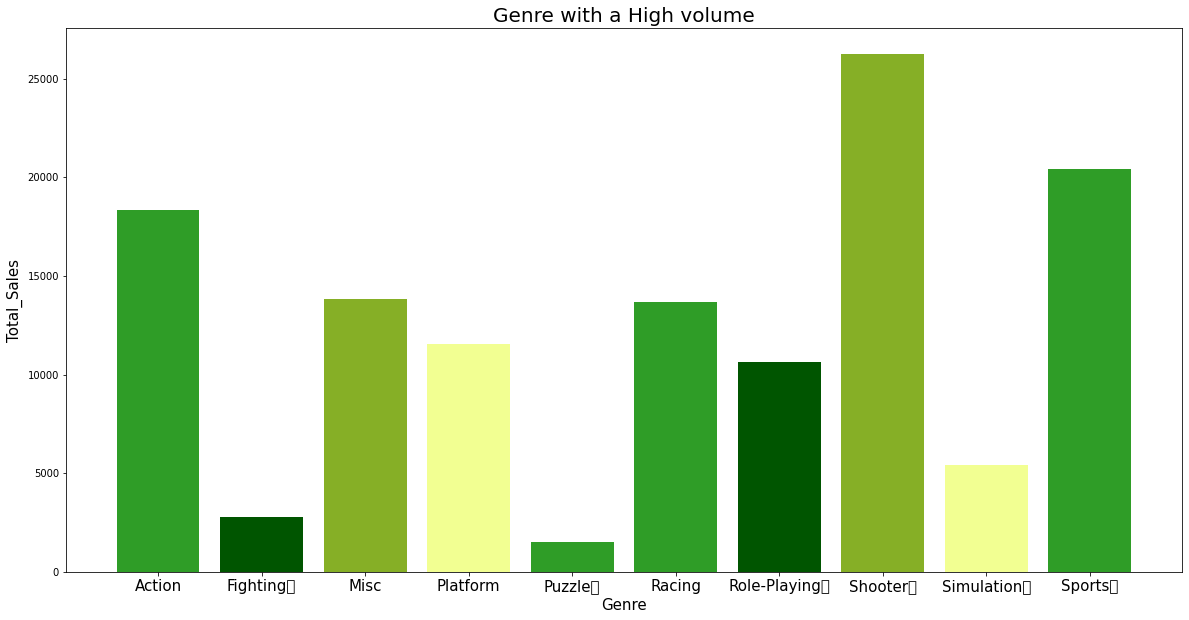

In [ ]:
label = ['Action', 'Fighting	', 'Misc', 'Platform','Puzzle	','Racing', 'Role-Playing	', 'Shooter	','Simulation	','Sports	']

index = np.arange(len(label))

plt.bar(index,df5 ,color = ["#2F9D27", "#005500", "#86AF26",'#F2FF92','#2F9D27'])

plt.rcParams["figure.figsize"] = (20,10)

plt.title('Genre with a High volume', fontsize=20)

plt.xlabel('Genre', fontsize=15)

plt.ylabel('Total_Sales', fontsize=15)

plt.xticks(index, label, fontsize=15)

plt.show()


#2000년대 이후 지난 20년간 출고량 top100게임의 출고량을 장르별로 나눠 합산한 계산은 다음과 같다. 
#Shooter종류의 게임이 가장 높고 그 다음이 엑션과 스포츠게임이다.


In [ ]:
df1 =df[df.Year>=2000]
#확인하니 지워짐
df1.groupby(df1["Year"]).size()
sortdf1 = df1.sort_values(by=['Total_Sales'], ascending=False)
sales_top100 = sortdf1.head(100)
sales_top100 = sales_top100[['Name', 'Platform','Year', 'Genre', 'Total_Sales']]
sales_top100 = sales_top100.sort_values(by=['Total_Sales'], ascending=False)
F = sales_top100.reset_index(drop=True)
sales_top100

Name Platform    Year         Genre  Total_Sales
2908                    Wii Sports      Wii  2006.0        Sports         8274
12579               Mario Kart Wii      Wii  2008.0        Racing         3583
3352             Wii Sports Resort      Wii  2009.0        Sports         3300
6937         New Super Mario Bros.       DS  2006.0      Platform         3001
3014                      Wii Play      Wii  2006.0          Misc         2900
...                            ...      ...     ...           ...          ...
6102   The Elder Scrolls V: Skyrim      PS3  2011.0  Role-Playing          655
1629          Assassin's Creed III      PS3  2012.0        Action          649
10300         Halo: Combat Evolved       XB  2001.0       Shooter          643
8629       Pokémon Emerald Version      GBA  2004.0  Role-Playing          642
4601                Kingdom Hearts      PS2  2002.0  Role-Playing          640

[100 rows x 5 columns]

## 지난 20년간 많이 판매된 게임 100개중에 플랫폼 별로 가장 높은 출고량

In [ ]:
Platfor_100 = sales_top100.groupby(['Platform'])['Total_Sales'].sum()
Platfor_100.reset_index()

Platform  Total_Sales
0       3DS         6067
1        DS        19850
2       GBA         3275
3        GC         1401
4        PC          811
5       PS2        11204
6       PS3        17220
7       PS4         6356
8       PSP          772
9       Wii        35727
10     WiiU          695
11     X360        18786
12       XB         1491
13     XOne          728

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


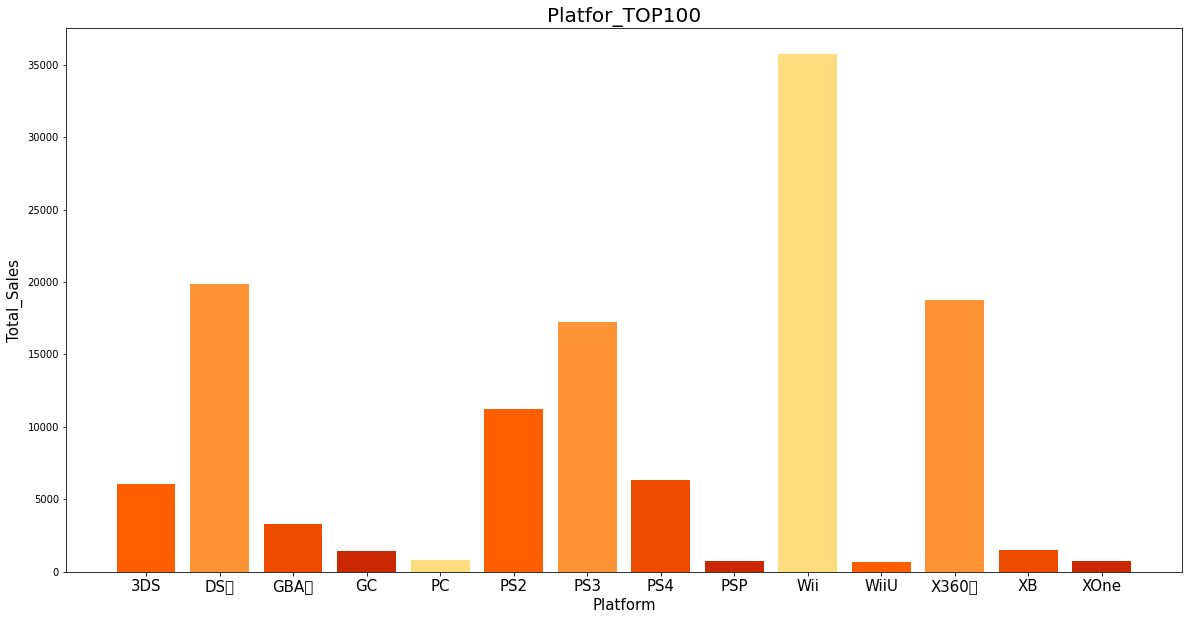

In [ ]:
label = ['3DS', 'DS	', 'GBA	', 'GC','PC','PS2', 'PS3', 'PS4','PSP','Wii','WiiU','X360	','XB','XOne']

index = np.arange(len(label))

plt.bar(index,Platfor_100,color = ["#FF5E00", "#FF9436", "#ED4C00",'#C92800','#FFDC7E'])

plt.rcParams["figure.figsize"] = (20,10)

plt.title('Platfor_TOP100', fontsize=20)

plt.xlabel('Platform', fontsize=15)

plt.ylabel('Total_Sales', fontsize=15)

plt.xticks(index, label, fontsize=15)

plt.show()